Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [72]:
import pandas as pd
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import shap
import eli5
from eli5.sklearn import PermutationImportance
#
df = pd.read_csv('vgsales.csv')

In [73]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [74]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [75]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [76]:
df[df['Genre'] == 'Misc']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26
68,69,Just Dance 2,Wii,2010.0,Misc,Ubisoft,5.84,2.89,0.01,0.78,9.52
...,...,...,...,...,...,...,...,...,...,...,...
16516,16519,DJ Max Technika Tune,PSV,2012.0,Misc,CyberFront,0.00,0.00,0.01,0.00,0.01
16519,16522,Bakumatsu Rock: Ultra Soul,PSP,2014.0,Misc,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16523,16526,Style Book: Cinnamoroll,DS,2006.0,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16536,16539,Patrician IV: Gold Edition,PC,2011.0,Misc,Kalypso Media,0.00,0.01,0.00,0.00,0.01


In [77]:
df['Genre'].value_counts().nunique()

12

In [78]:
df['Publisher'].value_counts().nunique()

79

In [79]:
df['Platform'].value_counts().nunique()

28

In [80]:
df.shape

(16598, 11)

In [81]:
df[df['Year']==2020]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [82]:
df.drop(5957,inplace=True)

In [83]:
df['Year'].describe()

count    16326.000000
mean      2006.405611
std          5.828189
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2017.000000
Name: Year, dtype: float64

In [84]:
# Get rid of leakage
df.drop(columns=['Global_Sales','Name'],inplace=True)

In [85]:
df = df.set_index('Rank')

In [86]:
df.iloc[24]

Platform                        PS2
Year                           2002
Genre                        Action
Publisher      Take-Two Interactive
NA_Sales                       8.41
EU_Sales                       5.49
JP_Sales                       0.47
Other_Sales                    1.78
Name: 25, dtype: object

# Split Data

In [87]:
# Split the Target from the Feature Matrix
target = 'Genre'
X = df.drop(columns=target)
y = df[target]

In [88]:
# Split the train/validation/test sets

# # Train on data from before 2012
# X_train = X[X['Year'] < 2012]
# y_train = y[X['Year'] < 2012]

# # Validate on data from the year 2012
# X_val = X[(X['Year'] >= 2012) & (X['Year'] < 2015)]
# y_val = y[(X['Year'] >= 2012) & (X['Year'] < 2015)]

# # Test on data from after 2012
# X_test = X[X['Year'] >= 2015]
# y_test = y[X['Year'] >= 2015]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Check the shapes to make sure they split correctly
print('X_train shape:',X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:',X_val.shape)
print('y_val shape:', y_val.shape)
# print('X_test shape:',X_test.shape)
# print('y_test shape:', y_test.shape)

X_train shape: (13277, 7)
y_train shape: (13277,)
X_val shape: (3320, 7)
y_val shape: (3320,)


# Establish a Baseline

In [90]:
print("Baseline Accuracy Score: ", y_train.value_counts(normalize=True).max())

Baseline Accuracy Score:  0.198915417639527


In [91]:
# base_pred = [y_train.mean()] * len(y_train)

In [92]:
# baseline_mae = mean_absolute_error(y_train,base_pred)
# baseline_rmse = mean_squared_error(y_train,base_pred)
# baseline_r2score = r2_score(y_train,base_pred)

# print("baseline MAE Score:", baseline_mae)
# print("baseline RMSE Score:", baseline_rmse)
# print("baseline R2 Score:", baseline_r2score) 

# Build a Model

## Build a Gradiant Boosting Model

In [93]:
encoder = OrdinalEncoder()
XT_train = encoder.fit_transform(X_train)
XT_val = encoder.fit_transform(X_val)
# XT_test = encoder.fit_transform(X_test)

imputer = SimpleImputer()
XTT_train = imputer.fit_transform(XT_train)
XTT_val = imputer.fit_transform(XT_val)

model = XGBClassifier(random_state=42, n_jobs=-1,max_depth=3)


model.fit(XTT_train, y_train);

In [94]:
train_pred = model.predict(XTT_train)
val_pred = model.predict(XTT_val)
# test_pred = model.predict(XT_test)



In [95]:
print('Train Accuracy Score: ', model.score(XTT_train,y_train))
print('Validation Accuracy Score: ', model.score(XTT_val,y_val))
# print('Test Accuracy Score: ', model.score(XT_test,y_test))

Train Accuracy Score:  0.44136476613692854
Validation Accuracy Score:  0.34518072289156626


## Build a Linear Model

In [96]:
model_line = LogisticRegression()
model_line.fit(XTT_train, y_train)

LogisticRegression()

In [97]:
train_pred = model_line.predict(XTT_train)
val_pred = model_line.predict(XTT_val)

In [98]:
print('Train Accuracy Score: ', model_line.score(XTT_train,y_train))
print('Validation Accuracy Score: ', model_line.score(XTT_val,y_val))

Train Accuracy Score:  0.20019582737064096
Validation Accuracy Score:  0.2069277108433735


# PDP plotting fun...ness

In [99]:
XTT_val

array([[4.000e+00, 2.009e+03, 3.000e+00, ..., 3.000e-02, 0.000e+00,
        1.000e-02],
       [1.200e+01, 2.007e+03, 1.100e+01, ..., 4.000e-02, 1.000e-02,
        4.000e-02],
       [9.000e+00, 2.001e+03, 9.500e+01, ..., 1.000e-02, 0.000e+00,
        0.000e+00],
       ...,
       [1.500e+01, 1.997e+03, 3.100e+01, ..., 8.000e-02, 0.000e+00,
        1.000e-02],
       [1.200e+01, 2.010e+03, 1.100e+02, ..., 9.000e-02, 0.000e+00,
        3.000e-02],
       [5.000e+00, 2.008e+03, 1.110e+02, ..., 0.000e+00, 4.000e-02,
        0.000e+00]])

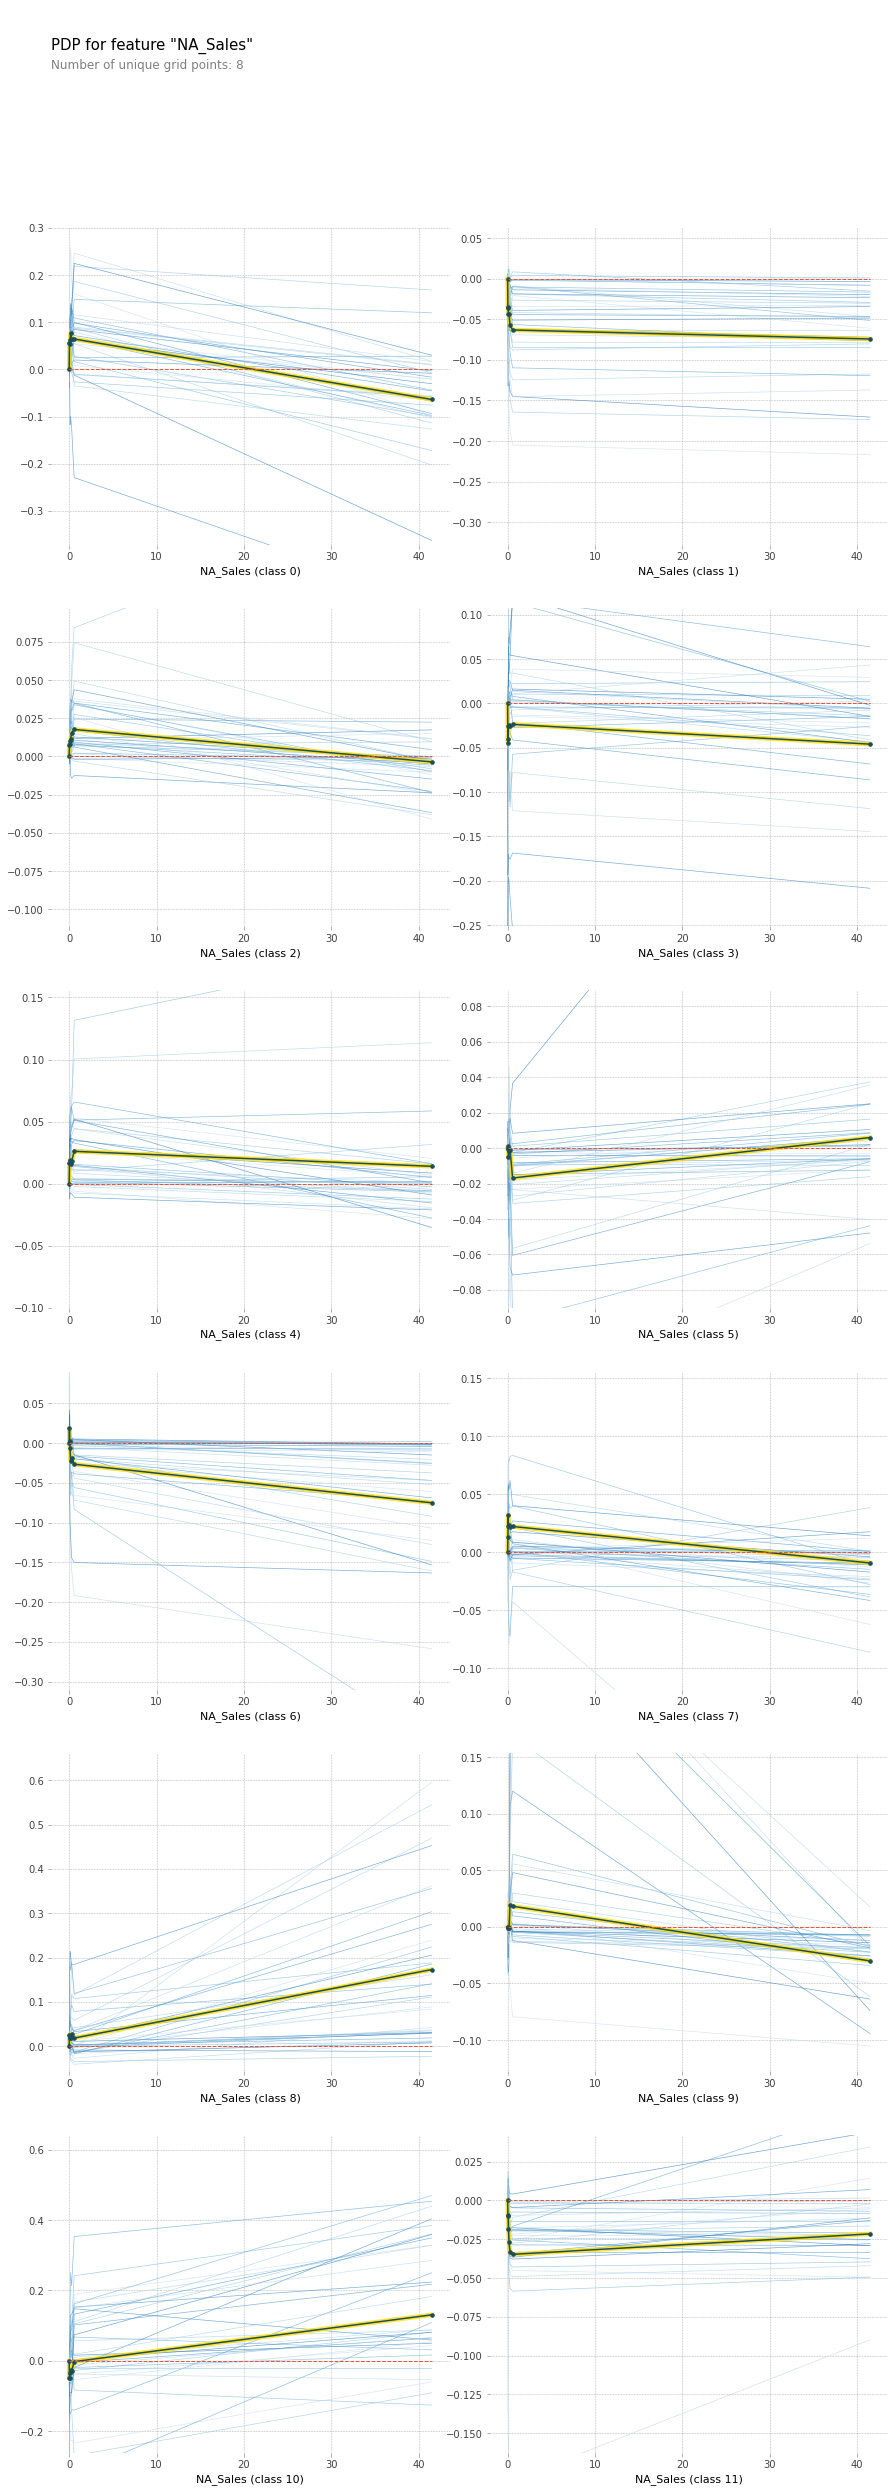

In [100]:
feature = 'NA_Sales'

iso = pdp_isolate(
    model=model,
    dataset=XT_val,
    model_features=XT_val.columns,
    feature=feature    
)
pdp_plot(iso, feature_name=feature,plot_lines=True,frac_to_plot=0.01);

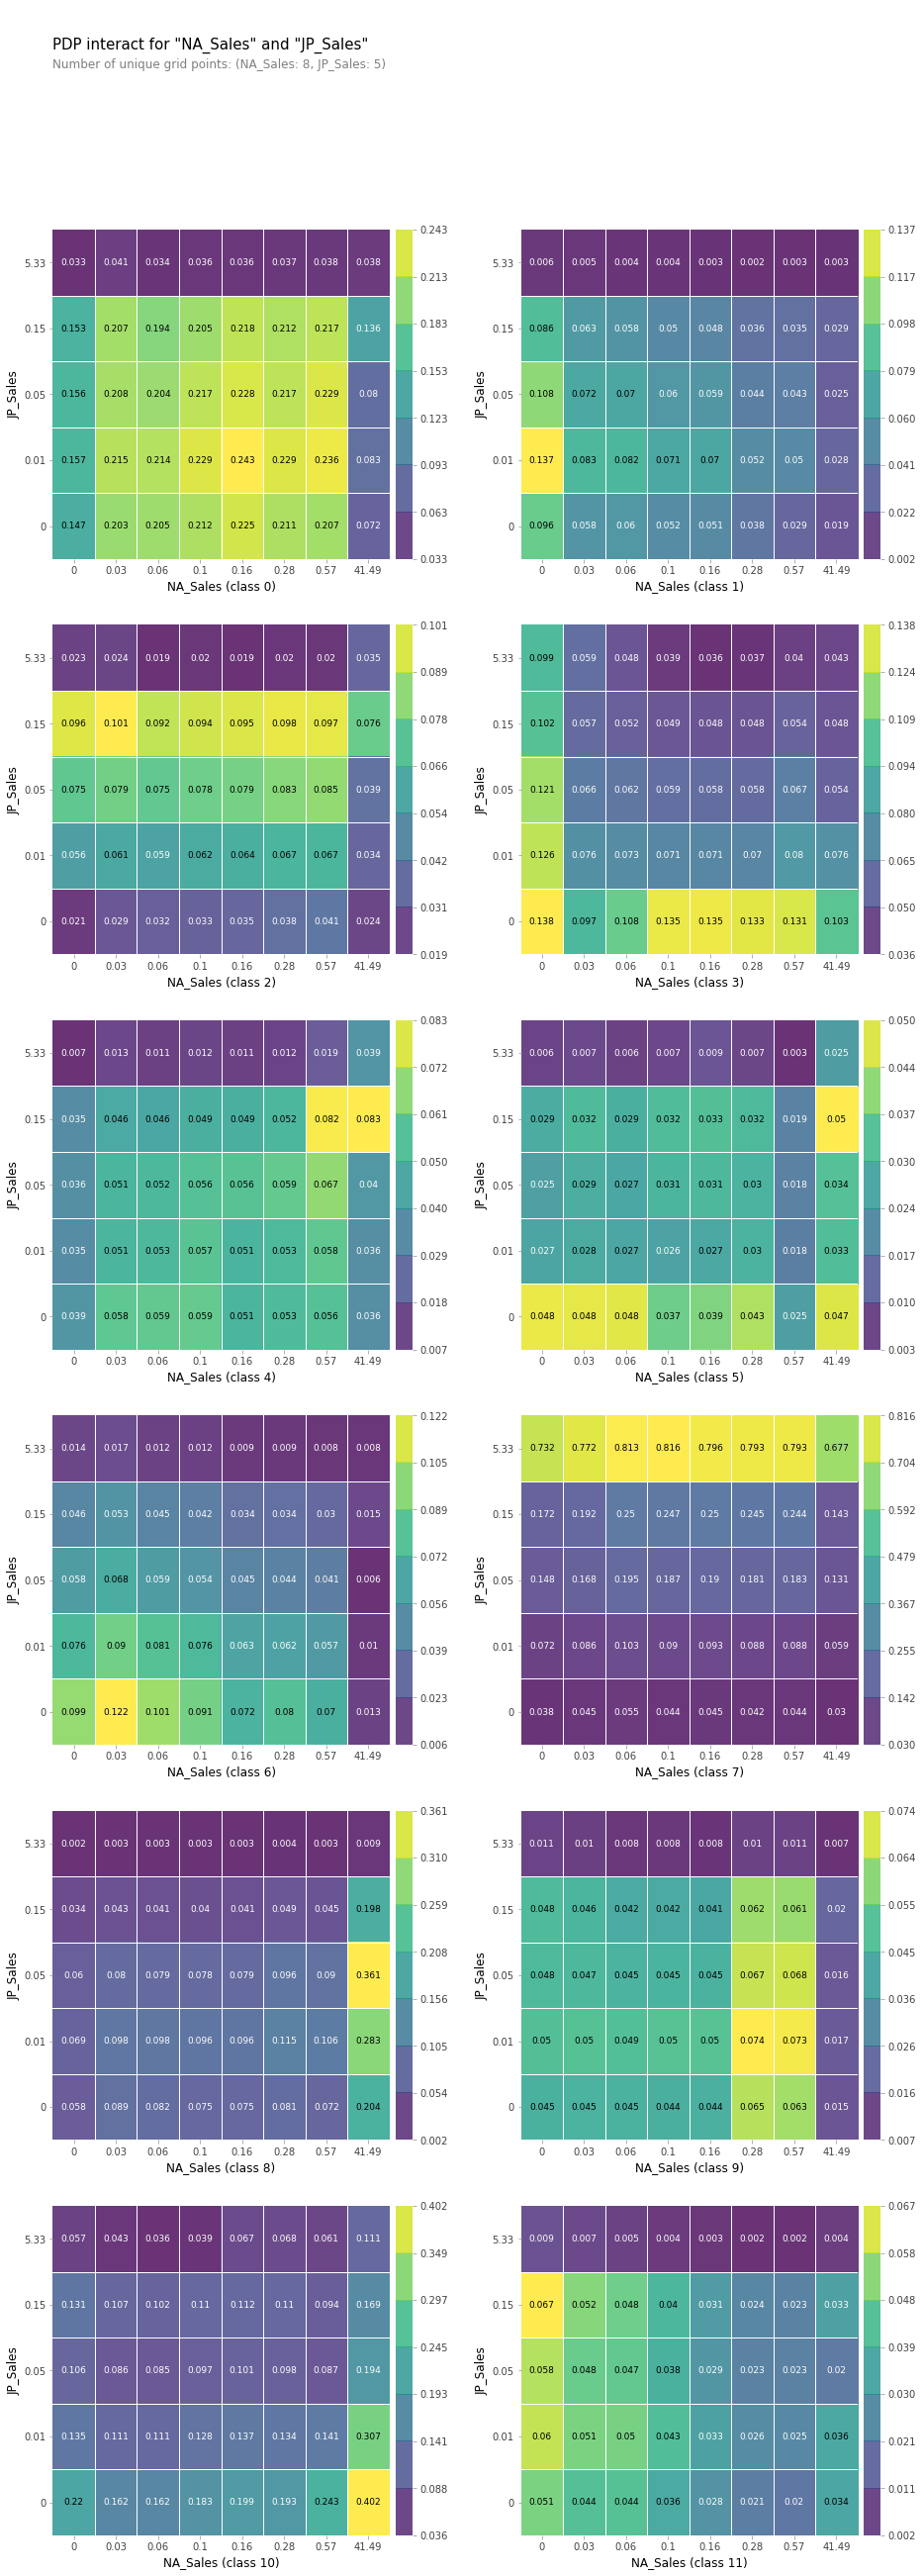

In [101]:
feature = ['NA_Sales','JP_Sales']

inter = pdp_interact(
    model=model,
    dataset=XT_val,
    model_features=XT_val.columns,
    features=feature    
)
pdp_interact_plot(inter, feature_names=feature,plot_type='grid');

In [102]:

row = XT_val.iloc[[1]]
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[4],
    shap_values=shap_values[4],
    features=row
)

How much each feature is pulling the prediction

In [103]:
shaps = pd.Series(shap_values[0][0],zip(row.columns,row.values[0]))
shaps

(Platform, 12.0)       0.016917
(Year, 2007.0)        -0.086102
(Publisher, 11.0)      0.282209
(NA_Sales, 0.32)      -0.000348
(EU_Sales, 0.04)       0.169272
(JP_Sales, 0.01)      -0.005789
(Other_Sales, 0.04)   -0.031060
dtype: float32

In [104]:
row

,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,,,,
4791,12,2007.0,11.0,0.32,0.04,0.01,0.04


# eli5: Permutation Importances

In [105]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(XTT_val,y_val)

PermutationImportance(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=1,
                                              objective='multi:softprob',
                                       

In [106]:
feature_importances = permuter.feature_importances_
feature_names = X_val.columns.tolist()

In [107]:
eli5.show_weights(permuter,top=7,feature_names=feature_names)

Weight,Feature
0.1104 ± 0.0095,Publisher
0.0496 ± 0.0109,JP_Sales
0.0419 ± 0.0064,Year
0.0323 ± 0.0058,NA_Sales
0.0323 ± 0.0112,Platform
0.0194 ± 0.0072,EU_Sales
0.0054 ± 0.0044,Other_Sales
